### Problem statement
The following assignment concerns the numpy.random package in Python. You are required to create a Jupyter notebook explaining the use of the package, including detailed explanations of at least five of the distributions provided for in the package.

There are four distinct tasks to be carried out in your Jupyter notebook.
1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

# Programming for Data Analysis - Assignment

## Generation of random numbers using the `numpy.random` package
***

## Introduction
***

### Overall purpose of the package
Random numbers are used widely in several computational science areas, including in:
- statistical sampling: for example, in a quality control test, it is definitely more feasible to test a subset (randomly picked) rather than the entire lot of products.
- image analysis to ensure a particular algorithm is able to distinguish between features and noise
- cryptography so that a secret message, such as your credit card details, can be transmitted securely without anyone else being able to read it
- gaming and gambling:
- bioinformatics - cluster analysis, bootstrapping tests and stochastic simulations of biosystems (http://www0.cs.ucl.ac.uk/staff/d.jones/GoodPracticeRNG.pdf)
- [and more](https://en.wikipedia.org/wiki/Applications_of_randomness)

Notes: Equations are rendered here using [Tex](https://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html#Motivating-Examples)

### How to generate random numbers? What is the difference between a true random number generator and a pseudo-random generator?

Now we know why random numbers are important in computational sciences, we need to know how to generate them. Note that there is a whole discipline devoted to the generation on random numbers (read more: https://www.random.org/randomness/ and Tuncer & Kaya (2018) https://www.hindawi.com/journals/cmmm/2018/3579275/).

There are two types of random number generators:

1. true random number generator - these are specialized devices that generate random numbers from microscopic physical processes. In principle, these can be any physical process including mouse-click events of computer users, bioelectric signals such as [electrocardiogram](https://ieeexplore.ieee.org/document/6513218), [atmospheric noise](random.org), thermal noise and the [photoelectric effect](https://en.wikipedia.org/wiki/Photoelectric_effect), so long these phenomena result in low-level, statistically-random signals.

    While the true generators are non-deterministic, they suffer from poor efficiency and require sophisticated and expensive hardware. In addition, there are many instances where the complexity and expense of true generators are not justified. For example, applications with legal ramifications such as gambling and random drug testing need to be truly random (otherwise, the gambling company may be sued!) whereas simulations in recreational computer games need a large number of random numbers generated in a quick succession not achievable by true generators. In the latter situations, pseudo-random generators come very handy.

1. pseudo-random number generator - Although Nature is a good source of random numbers, computers need to be programmed (in a deterministic manner, based on _a priori_ knowledge) to generate random numbers. To achieve this, either an algorithm (a mathematical equation) or a probability density function (a statistical method) can be used.

    **Computational method**
    One of the most common equation used is the [linear congruential generator](http://demonstrations.wolfram.com/LinearCongruentialGenerators/), defined by [a recurrence relation](https://en.wikipedia.org/wiki/Linear_congruential_generator):

    <center><i>X</i><sub>n+1</sub> = (<i>aX</i><sub>n</sub> + <i>c</i>) mod <i>m</i></center>
    
    **Statistical method**
    By definition, the numbers generated by a pseudo-random number generator using a mathematical function results in a continuous uniform distribution defined as follows: $f(x) = \frac{1}{b-a}$. In other words, if we generate a set of random numbers, the frequency by which any given number occurs is (at least theoretically) a constant.

    This set of uniformly-distributed numbers can then be transformed into a different distribution mathematically, through the [inversion method](https://www.statsdirect.com/help/randomization/generate_random_numbers.htm) or the [acceptance-rejection method](https://www.eg.bucknell.edu/~xmeng/Course/CS6337/Note/master/node59.html). There are also more details on [Wikipedia](https://en.wikipedia.org/wiki/Pseudo-random_number_sampling). 


### Why use `numpy.random`?

Methods such as the linear congruential generator (described above) and (also linear recursion-based) Mersenne Twister (used by the Python `random()` function) can be easily cracked, resulting in the ability of someone with a malicious intent (a hacker) to predict the sequence of random numbers, so long as he/she has a sufficiently long subsequence of the outputs. In other words, linear recursion-based methods are significantly insecure. Read more: [link1](https://security.stackexchange.com/questions/4268/cracking-a-linear-congruential-generator), [link2](http://www.math.sci.hiroshima-u.ac.jp/~m-mat/MT/efaq.html) and [link3](https://www.bishopfox.com/blog/2014/08/untwisting-mersenne-twister-killed-prng/)

Where security matters, a subtype of pseudo-random number generators, called [cryptographically-secure pseudo-random number generator (CPRNG)](https://en.wikipedia.org/wiki/Cryptographically_secure_pseudorandom_number_generator) must be used. Consequently, the [Python documentation for the `random()` function](https://docs.python.org/3.7/library/random.html) explicitly warns against its use in cryptography and recommends instead the use of the [`secrets` module](https://docs.python.org/3.7/library/secrets.html#module-secrets). Similarly, the [`numpy.random` package also uses Mersenne Twister](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.RandomState.html).

So [why use this package if they are the same](https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python)? Firstly, not all situations called for the use of CPRNG. In addition, the package is also Numpy-aware, meaning arrays of numbers can be handled more efficiently than the standard Python `random()` function, leading to a more practicable use in statistics and data analytics.

## Understanding the `numpy.random` visually
***

In this notebook, we will look at the following functions:
1. the “Simple random data” and “Permutations” functions.
1. the use and purpose of at least five “Distributions” functions.
1. the use of seeds in generating pseudorandom numbers.

However, we should first look at `numpy` arrays. Before doing that, let's import some Python libraries:

In [2]:
import numpy as np # we are using the numpy.random package for this notebook
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### Dimensionality of arrays

This graphics below is an excellent way to visualize simple and multidimensional arrays.

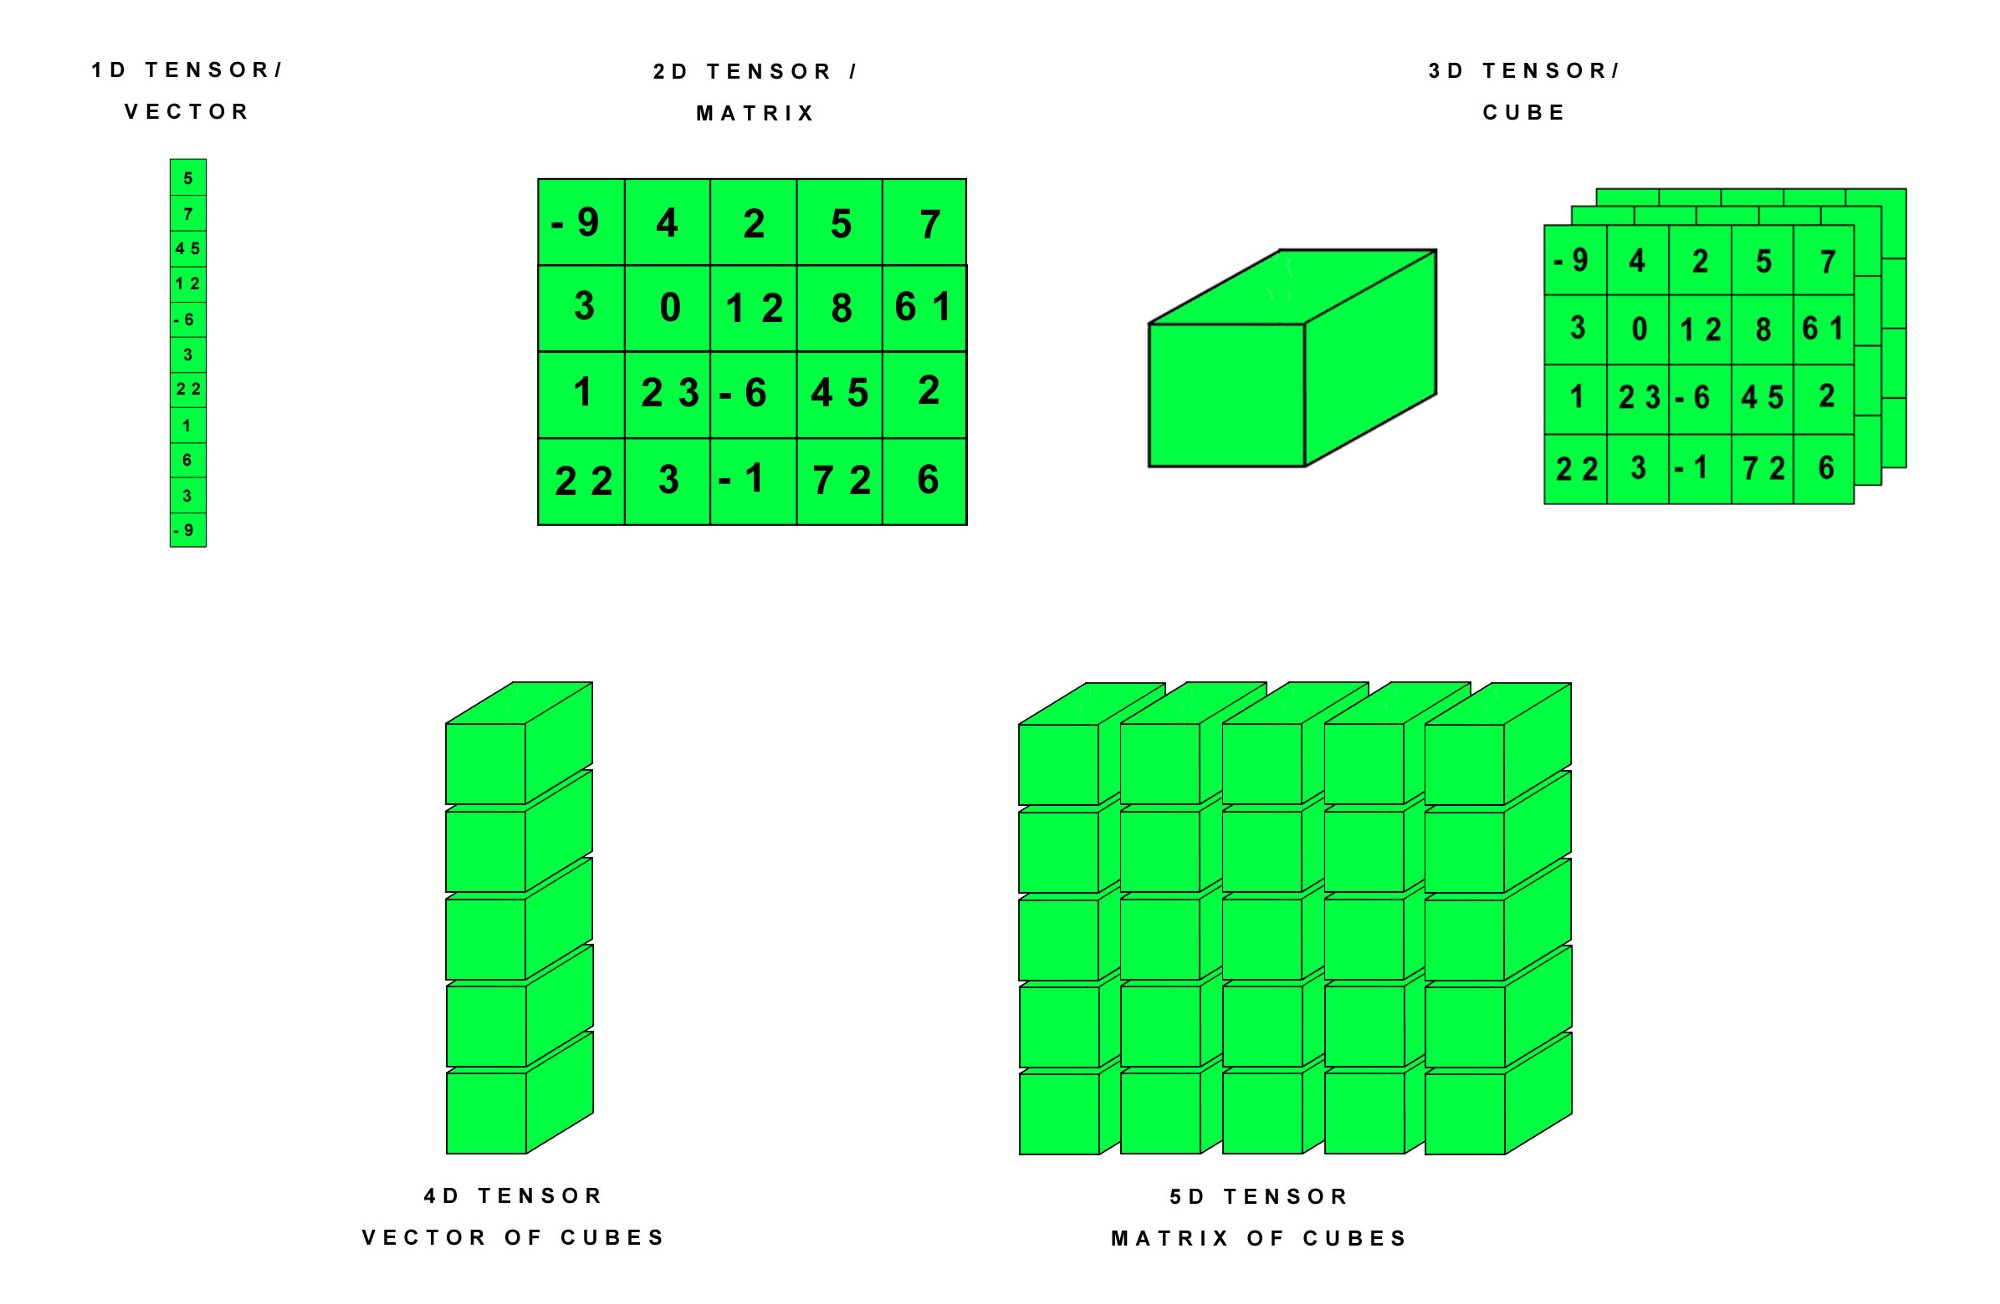

<div style='text-align:right'><i>Taken from <a href='https://hackernoon.com/learning-ai-if-you-suck-at-math-p4-tensors-illustrated-with-cats-27f0002c9b32'>Hacker Noon</i></div><br>

At the very basic level, a 1D array is simply a collection of numbers in a column (or a row). By adding another dimension, *i.e.* a row, we now have a collection of numbers arranged in a column AND a row (think of it as a rectangle). This 2D array is a matrix.

This rectangle can be converted into a cube in the third dimension - the best analogy for this is a collection of rectangles arranged like sheets in a book.

We can also stack a few books together on a bookshelf to create a fourth dimension (4D array). As you will see in a library, our books will be arranged on multiple bookshelves (fifth dimension - 5D array).

This visualization technique allows us to construct even more complex arrays. Actually, if you notice carefully, the output of the `rand()` function is already formatted with a white space between two matrices.

#### 1D array of a single row containing three numbers

In [3]:
example_1D_array = np.random.rand(3)
example_1D_array

array([0.80187718, 0.19354387, 0.85795529])

#### 2D array of 2 rows and 3 columns

In [4]:
example_2D_array = np.random.rand(2,3)
example_2D_array

array([[0.06771814, 0.59508458, 0.95411272],
       [0.89357827, 0.64713775, 0.18132653]])

#### 3D array of 2 rows and 3 columns arranged as 4 sheets, making up a cube

Note that the sheets are separated by horizontal white spaces - see the example for 4D array below with an annotated image

In [5]:
example_3D_array = np.random.rand(4,2,3)
example_3D_array

array([[[0.76095546, 0.96084196, 0.22181662],
        [0.45155404, 0.93108966, 0.53466036]],

       [[0.74140367, 0.64390349, 0.14638255],
        [0.61926347, 0.82575544, 0.03699405]],

       [[0.21587892, 0.11427162, 0.53042244],
        [0.89437388, 0.06162154, 0.5213034 ]],

       [[0.7871656 , 0.40956056, 0.10950931],
        [0.57831549, 0.07480577, 0.20818776]]])

#### 4D array of 4 books each consisting of 5 sheets of 2 rows and 3 columns

In [6]:
example_4D_array = np.random.rand(4,5,2,3)
example_4D_array

array([[[[0.63567021, 0.95314536, 0.03898854],
         [0.43453492, 0.42820523, 0.55446959]],

        [[0.16754183, 0.77599834, 0.53197496],
         [0.74715529, 0.11923897, 0.63628608]],

        [[0.25864706, 0.61588757, 0.82191882],
         [0.09478062, 0.47842898, 0.56776382]],

        [[0.58974826, 0.27896313, 0.40232662],
         [0.68511828, 0.43698271, 0.74329423]],

        [[0.58870622, 0.78030386, 0.92760926],
         [0.79962373, 0.29323827, 0.91076614]]],


       [[[0.79711752, 0.8351754 , 0.29065616],
         [0.19547058, 0.29912336, 0.08824451]],

        [[0.48205927, 0.96606702, 0.59297402],
         [0.99854775, 0.62306619, 0.7686755 ]],

        [[0.45584971, 0.83910756, 0.03836052],
         [0.40117883, 0.81628722, 0.59253294]],

        [[0.25682069, 0.12258851, 0.28024058],
         [0.53953373, 0.89196493, 0.21113631]],

        [[0.50326733, 0.72093337, 0.1919651 ],
         [0.73844657, 0.27696926, 0.44391023]]],


       [[[0.898983  , 0.70071384, 0.

The array above can be visualized as follows:

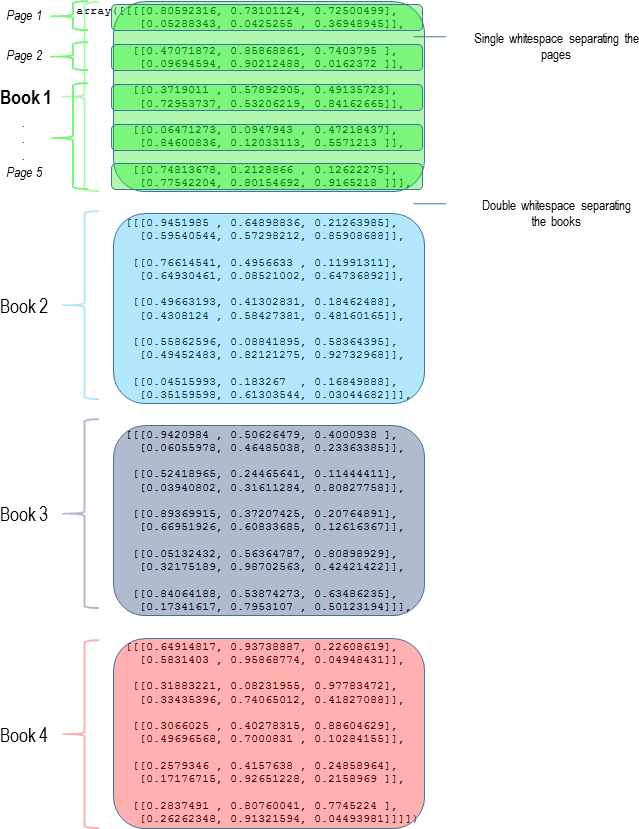

## Simple Random Data and Permutations functions
***

### Simple Random Data
The corresponding documentations are here: https://docs.scipy.org/doc/numpy/reference/routines.random.html

| Function | Official documentation | Own interpretation |
| -------- | ---------------------- | ------------------ |
| rand(d0, d1, …, dn) | Random values in a given shape | The values are taken from a uniform distribution over [0, 1). By providing more than one argument, multidimensional arrays can be obtained. |
| randn(d0, d1, …, dn) | Return a sample (or samples) from the “standard normal” distribution | Similar to the `rand()` function but from a normal distribution |
| randint(low[, high, size, dtype])	| Return random integers from low (inclusive) to high (exclusive) | Similar to the `rand()` function but from a discrete uniform distribution, because this will return only integers (discrete data) |
| random_integers(low[, high, size]) | Random integers of type np.int between low and high, inclusive | This function is almost the same as `randint()` except that both limits are inclusive (closed interval). When calling this function, Python will return `This function is deprecated. Please call randint(10, 20000 + 1) instead` |
| random_sample([size]) | Return random floats in the half-open interval [0.0, 1.0). | Returns random floating-point numbers similar to `rand()` but only takes one argument indicating the number of values to be return. Therefore, it cannot output multidimensional arrays. |
| random([size]) | Return random floats in the half-open interval [0.0, 1.0). | Same as `random_sample()` - see Note1 below |
| ranf([size]) | Return random floats in the half-open interval [0.0, 1.0). | Same as `random_sample()` |
| sample([size]) | Return random floats in the half-open interval [0.0, 1.0). | Same as `random_sample()` |
| choice(a[, size, replace, p]) | Generates a random sample from a given 1-D array | This is an interesting function, as it allows a random selection of a pre-defined number of values from a 1D array. Alternatively, if an integer is passed to the `a` argument, the function will first create an evenly-spaced Numpy array from the `range()` function before randomly selecting those values. Additionally, the `replace` argument can be used as a form of permutation.  |
| bytes(length) | Return random bytes | Self-explanatory |

<i>Note1: According to the source code for [`numpy.random`](https://github.com/numpy/numpy/blob/master/numpy/random/__init__.py):

<blockquote>
# Some aliases:<br>
ranf = random = sample = random_sample<br>
__all__.extend(['ranf', 'random', 'sample'])
</blockquote></i>

In order to visualize the outputs of the different functions, the code below will create a few variables that can then be examined by plotting the values.

In [7]:
# this will return an array containing 1000 random numbers uniformly-distributed
output_function_rand = np.random.rand(1000)

# this will return an array containing 1000 random numbers normally-distributed
output_function_randn = np.random.randn(1000)

# returns 1000 random integers between 10 (inclusive) and 20,000 (exclusive)
output_function_randint = np.random.randint(10, 2000, 1000)

# select 5 values randomly from the output_function_randint array with replacement
random_selection_from_output_function_randint = np.random.choice(output_function_randint, 5)

#data = [go.Histogram(x=random_array,)]
#iplot(data)

In [8]:
# plots with dropdown menu

trace_uniform = go.Histogram(x=output_function_rand)
trace_normal = go.Histogram(x=output_function_randn)
trace_integer = go.Histogram(x=output_function_randint, xbins=dict(start=0, end = 2000, size=5), autobinx=False )

trace_randomSelection = go.Histogram(x=random_selection_from_output_function_randint,
                                    xbins=dict(start=np.amin(random_selection_from_output_function_randint),
                                              end = np.amax(random_selection_from_output_function_randint),
                                              size = 5), 
                                     autobinx=False)

data = [trace_uniform, trace_normal, trace_integer, trace_randomSelection]

updatemenus = list([
    dict(active=-1,
         buttons=list([   
            dict(label = 'rand() function',
                 method = 'update',
                 args = [{'visible': [True, False, False, False]},
                         {'title': 'Random numbers from rand() are uniformly distributed'
                          }]),
            dict(label = 'randn() function',         
                 method = 'update',
                 args = [{'visible': [False, True, False, False]},
                         {'title': 'Random numbers from randn() are normally distributed'
                          }]),
            dict(label = 'randint() function',
                 method = 'update',
                 args = [{'visible': [False, False, True, False]},
                         {'title': 'Random integers from randint() are uniformly distributed',
                          }]),
            dict(label = 'choice() function using values generated from randint()',
                 method = 'update',
                 args = [{'visible': [False, False, False, True]},
                         {'title': 'Distribution of randomly-selected values from a larger set of \
randomly-generated integers',
                          }])
        ]),
    )
])

layout = dict(title='Histograms from different numpy.random functions', showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
iplot(fig)

### Permutations

Given a set or an array of numbers, it is possible to arrange the elements within the array in several particular orders.

For instance, the array of [1, 2, 3, 4] can be rearranged as follows:

*Note: the code below uses the Sympy library, a Python library for symbolic computing.*

In [9]:
from sympy.utilities.iterables import multiset_permutations

for possible_array in multiset_permutations([1,2,3,4]):
    print(possible_array)

[1, 2, 3, 4]
[1, 2, 4, 3]
[1, 3, 2, 4]
[1, 3, 4, 2]
[1, 4, 2, 3]
[1, 4, 3, 2]
[2, 1, 3, 4]
[2, 1, 4, 3]
[2, 3, 1, 4]
[2, 3, 4, 1]
[2, 4, 1, 3]
[2, 4, 3, 1]
[3, 1, 2, 4]
[3, 1, 4, 2]
[3, 2, 1, 4]
[3, 2, 4, 1]
[3, 4, 1, 2]
[3, 4, 2, 1]
[4, 1, 2, 3]
[4, 1, 3, 2]
[4, 2, 1, 3]
[4, 2, 3, 1]
[4, 3, 1, 2]
[4, 3, 2, 1]


As shown above, the array can be ordered into 24 sets without replacement. It is actually trivial to calculate the number of possible unique sets by considering the following:

1. If we have an array of 4 elements and we want to select all 4 of them, there are 4 possible options to place in the first position (*i.e.* we can place 1, 2, 3 or 4 first). Let's assume we placed element '3' in the first position.

    Resulting array: 3 _ _ _
    <br>
    
1. If we were to not replace the element back into the original array, then the number of available options now is only 3 (elements 1, 2, and 4). Assume that we place, in the second position, the element 1.

    Resulting array: 3 1 _ _
    <br>

1. Now, we are left with only the elements 2 and 4 (2 options). Let's place '4' in the third position.

    Resulting array: 3 1 4 _
    <br>
    
1. As we do not have any more elements except for '2', we obtained the result below.

    Resulting array: 3 1 4 2
    <br>

In essence, the possible options are 4 x 3 x 2 x 1 = 24, without replacements. In discrete mathematics term, this whole process is called permutation, a subject within combinatorics.

The `choice()` function demonstrated above in the Simple Random Data section, selects a subset of values, with or without replacement, from an array of values. Numpy also has a similar function, `permutation()` to perform permutations. In the `choice()` function, we can specify whether or not to replace the elements, how many elements to be sampled and the probability associated with each element. In contrast, the `permutation()` function is almost like a shuffling function in that it does not take any arguments except for the input sequence/array, as alluded by the official documentation for a particular [example](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html#numpy.random.choice):
> #This is equivalent to np.random.permutation...


The official documentation is located [here](https://docs.scipy.org/doc/numpy/reference/routines.random.html#permutations).

| <div align='center'>Function </div> | <div align='center'>Official documentation </div>| <div align='center'>Own interpretation</div> |
| :------: | :--------------------: | :----------------: |
| permutation(x) | Randomly permute a sequence, or return a permuted range | Elements in an array are ordered randomly. If x is an integer, `permutation(x)` first creates an evenly-spaced array with `np.arange(x)`. This function is similar to `choice`- see explanation above |
| shuffle(x) | Modify a sequence in-place by shuffling its contents | Similar to `permutation()`, except the sequence is modified in-place whereas the former returns a *copy* of the original sequence. The input must be an array |

In [10]:
# reorder the random_arr array randomly
random_arr = [1, 2, 3, 4]
np.random.permutation(random_arr)

array([3, 2, 1, 4])

In [11]:
# note that random_arr is not modified by the permutation() function
random_arr

[1, 2, 3, 4]

In [12]:
# Note, however, that the shuffle() function replaces the original copy of random_arr
np.random.shuffle(random_arr)
random_arr

[3, 4, 2, 1]

## Use and purpose of at least five “Distributions” functions
***

We will be looking at beta, exponential... so we need to import the corresponding libraries from Scipy...

In [17]:
from scipy.stats import beta, expon

### Beta distribution
Official documentations are available on the [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html#scipy.stats.beta) and [Numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.beta.html#numpy.random.beta) reference webpages.

The beta distribution takes two parameters, α and β (both > 0), that together determine the probability density function (PDF) (*i.e.* the y values / curve shape). The code below provides an interactive way to explore the change in the PDF for different values of α and β.

In this section, we will first look at how α and β values determine the shape of the curve, *i.e.* the PDF, based on the Scipy `beta()` function.

In [20]:

from ipywidgets import interactive, HBox, VBox

a= b= 1 # we need some a and b values for the initial y
x = np.arange(-0.5, 1, 0.01) # let's plot x from -0.5 to 1
y = beta.pdf(x,a,b) # calculate the beta probability density function using the x, a and b values from above

layout = go.Layout(
    title = 'Beta probability density function',
    xaxis = dict(title='x'),
    yaxis = dict(title='PDF'),
)

# plot y over x as a scatter plot
f = go.FigureWidget(data=[go.Scatter(x=x, y=y)], layout = layout)

# we need to assign the slider to a function - this slider is actually from ipywidgets and not from plotly
def beta_function(a,b):
    f.data[0].y = beta.pdf(x,a,b)


parameter_slider = interactive(beta_function, a=(0.1, 50, 0.1), b=(0.1, 50, 0.1))
vb = VBox((f, parameter_slider))
vb.layout.align_items = 'center'
vb

    'data': [{'type': 'scatter',
              'uid': '7886a9b0-dc6c-11e8-9609-8…

Now we know how the PDF of beta distribution is dependent on α and β values, we can ask Numpy to generate a set of 1000 random values with a few different combinations of α and β, using the Numpy `beta` function.

Note that the Scipy `beta()` function above returns the PDF whereas the `numpy.random.beta()` function generates random numbers.

In [14]:
# generate 1000 random values with different α and β values

betaValues_alpha11_beta01 = np.random.beta(1.1,0.1,1000)
betaValues_alpha01_beta01 = np.random.beta(0.1,0.1,1000)
betaValues_alpha80_beta48 = np.random.beta(8.0,48,1000)

# plot all the variables - reference: https://plot.ly/python/histograms/
trace1 = go.Histogram(x=betaValues_alpha11_beta01, opacity=0.75, name = 'α = 1.1, β = 0.1')
trace2 = go.Histogram(x=betaValues_alpha01_beta01, opacity=0.75, name = 'α = 0.1, β = 0.1')
trace3 = go.Histogram(x=betaValues_alpha80_beta48, opacity=0.75, name = 'α = 8.0, β = 48')

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='overlay',
    title = 'Distribution of randomly-generated numbers based on beta distributions with different input parameters')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Plotly also comes with the ability to make distplots where the data distribution is shown along with a histogram.

In [15]:
import plotly.figure_factory as ff

hist_data = [betaValues_alpha11_beta01, betaValues_alpha01_beta01, betaValues_alpha80_beta48]
group_labels = ['α = 1.1, β = 0.1', 'α = 0.1, β = 0.1', 'α = 8.0, β = 48']

# figure_factory functions work slightly differently from standard plotly functions
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.2)
fig['layout'].update(
    title='Distribution of randomly-generated numbers based on beta distributions with different input parameters')

iplot(fig)

### Exponential distribution
Official documentations are here...
Similar to how we looked at the beta distribution, we will now look at the exponential function.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon
https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.exponential.html#numpy.random.exponential

In [27]:
loc = scale = 1 # we need some loc and scale values for the initial y
x = np.arange(-0.2, 1000, 0.1) # let's plot x from -0.2 to 1
y = expon.pdf(x,loc,scale) # calculate the expon PDF using the x, loc and scale values from above

layout = go.Layout(
    title = 'Exponential probability density function',
    xaxis = dict(title='x'),
    yaxis = dict(title='PDF'),
)

# plot y over x as a scatter plot
f = go.FigureWidget(data=[go.Scatter(x=x, y=y)], layout = layout)

# we need to assign the slider to a function - this slider is actually from ipywidgets and not from plotly
def exponential_function(loc,scale):
    f.data[0].y = expon.pdf(x,loc,scale)


parameter_slider = interactive(exponential_function, loc=(0, 50.1, 0.1), scale=(0.01, 50.1, 0.1))
vb = VBox((f, parameter_slider))
vb.layout.align_items = 'center'
vb

    'data': [{'type': 'scatter',
              'uid': '5b20c39e-dc6d-11e8-adc1-8…

Let's now generate 1000 random numbers according to the exponential distribution...
Note from above that the loc value determines the *x* value corresponding to the highest (peak) value of the PDF curve

The numpy `exponential()` only takes the scale value as an argument, not the loc.

In [31]:
# generate 1000 random values with different scale values

exponValues_scale01 = np.random.exponential(0.1,1000)
exponValues_scale1 = np.random.exponential(1,1000)
exponValues_scale10 = np.random.exponential(10,1000)

# plot all the variables - reference: https://plot.ly/python/histograms/
trace1 = go.Histogram(x=exponValues_scale01, opacity=0.95, name = 'scale = 0.1')
trace2 = go.Histogram(x=exponValues_scale1, opacity=0.35, name = 'scale = 1')
trace3 = go.Histogram(x=exponValues_scale10, opacity=0.35, name = 'scale = 10')

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='overlay',
    title = 'Distribution of randomly-generated numbers based on beta distributions with different input parameters')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Note the extremely narrow range of the random numbers generated with a scale of 0.1. In other words, the distribution falls on rapidly.

distplot here....

In [ ]:
hist_data = [betaValues_alpha11_beta01, betaValues_alpha01_beta01, betaValues_alpha80_beta48]
group_labels = ['α = 1.1, β = 0.1', 'α = 0.1, β = 0.1', 'α = 8.0, β = 48']

# figure_factory functions work slightly differently from standard plotly functions
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.2)
fig['layout'].update(
    title='Distribution of randomly-generated numbers based on beta distributions with different input parameters')

iplot(fig)

### Laplace distribution

### Poisson distribution

### Weibull distribution

In [75]:
np.random.beta(1,2)

0.08846436408349533